# EDA 04: Pacientes con diabetes

## Paso 1. Improts y planteamiento del problema

In [316]:
# imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

In [317]:
df = pd.read_csv("../data/raw/diabetes-data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* **Planteamiento:** Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. 
* **Objetivo:** Predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

## Paso 2: Exploración y limpieza de datos

## Paso 2. Exploración y análisis de datos

### Paso 2.1. Exploración de datos

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observaciones:**

> DIMENSIONES DEL DATASET Y TIPOS DE DATO:
> * Contiene 768 filas y 9 columnas  
> * Los datos que aporta el datset son diez columnas de tipo numérico (enteros y decimales) y séis columnas de tipo string (cadenas de texto)  
> * ``dtypes: float64(3), int64(7), object(6)`

In [319]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [320]:
# * **Valores nulos y duplicados:**
df.duplicated().sum()


np.int64(0)

In [321]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Observaciones:**

> VAOLRES ESTADÍSTICOS:

### Paso 2.2. Limpieza de datos

Paso 2.2.1 **Imputación y tratamiento de los valores a 0**

Importante tener en cuenta que tratamos datos médicos y no podemos inventar o elminar información que no este justificada ya que queremos obtener el minimo error en el resultado ya que se trata de la salud de una persona

In [322]:
# Fixing columns with missing values
data_zero = ["SkinThickness", "Insulin", "BloodPressure"]

# Replazing zeros with mean of each column
for column in data_zero:
    median_value = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, median_value)


df[df['Insulin']==0].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [323]:
len(df[df['Glucose']==0])

5

In [324]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,125,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,125,32.0,0.389,22,0
349,5,0,80,32,125,41.0,0.346,37,1
502,6,0,68,41,125,39.0,0.727,41,1


In [325]:
len(df[df['BMI']==0])

11

In [326]:
#Los valores BMI a 0 si tienen valores en SkinThickness
df[df['BMI']!= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


In [327]:
df = df.drop(df[(df['BMI'] == 0) & (df['Glucose'] == 0)].index)

**Conclusiones:**

* Se reemplazan los valores a 0 con la media ya que trabaja mejor cuando hay más cantidad de outliers para determinar el valor central de toda la columna.  
"SkinThickness", "Insulin", "BloodPressure":  

* Filtrado de filas: Hay columnas que todavía contienen valores a 0. Son Glucosa y BMI.  
Glucosa, normalmente no es posible que el resultado sea cerro y se considera un error asi que alimino esas filas  
BMI, no es posible que una persona pese 0kg así que elmino también esas filas

## Paso 3: Análisis Descriptivo

In [328]:
df.shape

(768, 9)

### PASO 3.1. **Descripción del conjunto de variables que aporta el dataset:**

**Varibales independientes**

COLUMNAS Y CARACTERÍSTICAS DE LAS VARIABLES: 

1. NUMÉRICAS:

> Continuas: Medicas
- `Glucose`. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- `BloodPressure`. Presión arterial diastólica (medida en mm Hg) (numérico)
- `SkinThickness`. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- `Insulin`. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- `BMI`. Índice de masa corporal (numérico)

> Discretas: Personas
- `Pregnancies`. Número de embarazos del paciente (numérico)
- `DiabetesPedigreeFunction`. Función de pedigrí de diabetes (numérico)
- `Age`. Edad del paciente (numérico)

2. CATEGÓRICAS  
No hay columnas co características categóricas

**Variable target** 
> ``Outcome``, es la variable que nos da el resultado del planteamiento del problema, si un paciente es diabetico o no. No se indica el tipo de diabetes de la persona.

### Paso 3.2. **Gráficos**

#### 3.2.1. **Histogramas**

In [329]:
# Separo las variables en grupo 
medical = ['DiabetesPedigreeFunction', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
person = ['Pregnancies', 'DiabetesPedigreeFunction', 'Age']



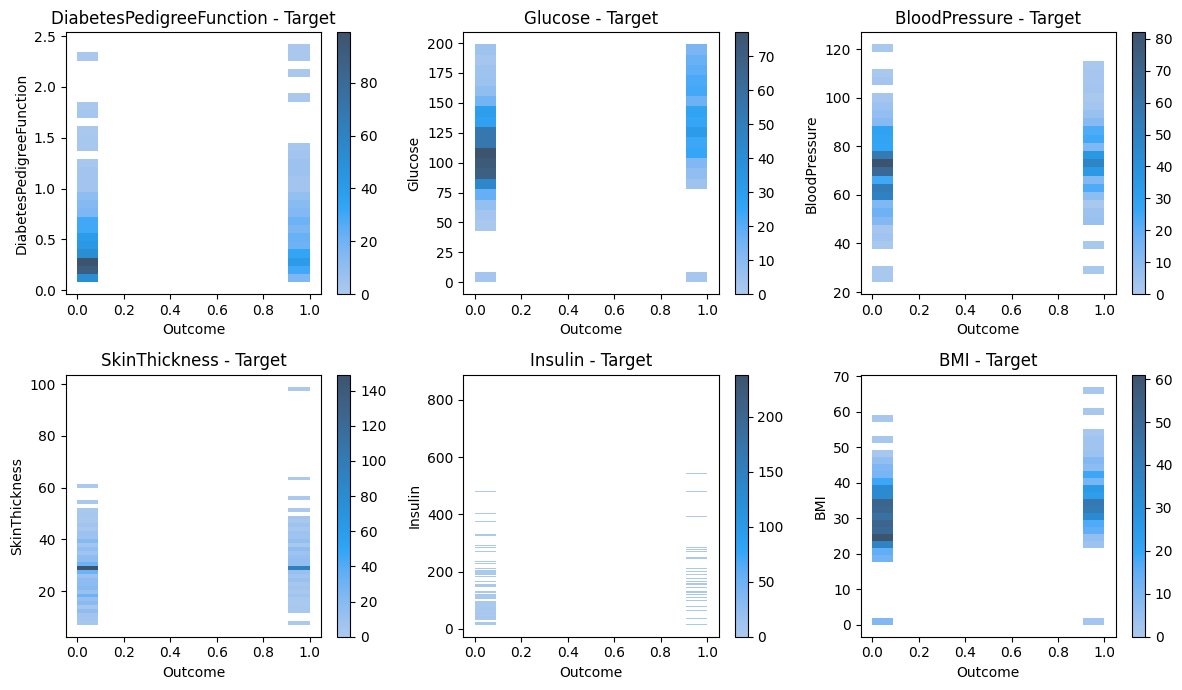

In [330]:
# La barra lateral represnta el conteo de datos con parámetro 'cbar'
import math 
# Gráficos para la información médica
n = len(medical)
cols_grid = 3                         
rows = math.ceil(n / cols_grid)   # math.ceil() calcula una divisón  y redondea a un numero entero
fig, axis = plt.subplots(rows,cols_grid, figsize=(12, 7))
axis = axis.flatten()
for i, columna in enumerate(medical):
    sns.histplot(data=df, x="Outcome", y=columna, cbar=True,
        ax=axis[i]
    )
    axis[i].set_title(f"{columna} - Target")

plt.tight_layout()
plt.show()


**Observaciones:**
* ``BMI``, niveles altos indican mayor resistencia a la insulina y diabetes de tipo 2 (índice de masa corporal). En el gráfico los valores se acumulan entre el 21 y 40  
Según rangos estándar OMS, a partir del 30 oo más se considera obesidad y este si es un factor que aumenta el reisgo a ser diabetico

 * ``Skinthickness``, según el grosos de la piel podemos detectar el nivel de grasa (obesidad del paciente) que es una condición que puede influir en la diabetes

 * ``BloodPressure``, relacionado con BMI, la resistencia a la insulina (absorción baja de glucosa) aumenta los niveles de presión arterial

 * ``Glucose``, los resultados de un test de tolerancia a la glucosa determinan si un paciente es diabetico o prediabetico. La mayor concentración de data esta entre el 80-130.  
 La mayoria de los diagnosticados sin diabetes según los rangos de glucosa podrían ser prediabeticos ya que lo normal sería menos de 100 de glucosa en sangre

 * ``Insulin``, la insulina sérica es la insulina presente en la sangre.Si los niveles son bajos entonces indica deficit de produccion de glucosa por lo tanto puede tratarse de diabetes avanzada  
 La insulina es la hormonoa que regula la absorción de la glucosa, por eso cuando es baja se presdenta como síntoma de diabetes.


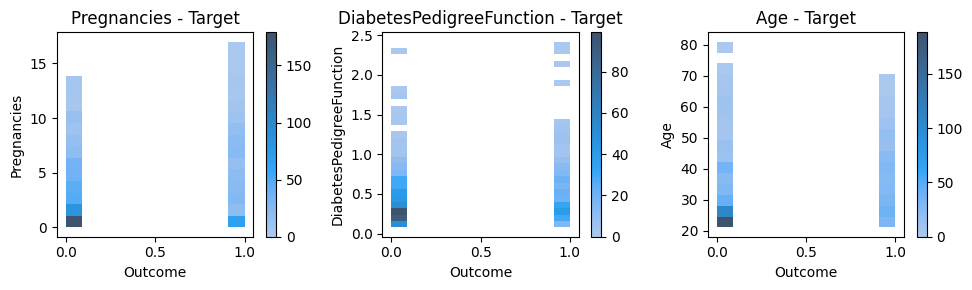

In [331]:
# Gráficos para la información personal
fig, axis = plt.subplots(1, 3, figsize=(10, 3))   

for i, columna in enumerate(person):          
    sns.histplot(data=df, x="Outcome", y=columna, cbar=True, ax=axis[i])
    axis[i].set_title(f"{columna} - Target")

plt.tight_layout()
plt.show()

**Observaciones:**
* ``Pregnancies``, los emabrazos puedes aumentar el riesgo de desarrollar diabetes tipo 2 en el futuro. La mayoria de las personas sí han estado embarazadas
 
* ``DiabetesPedigreeFunction``, riesgo genético de tener diabetes. Hay más concentración de datos en las personas que están diagnosticadas sin la enfermedad tienen indices entre el 0.20 y 0.40

#### 3.2.2. **Correlaciones**

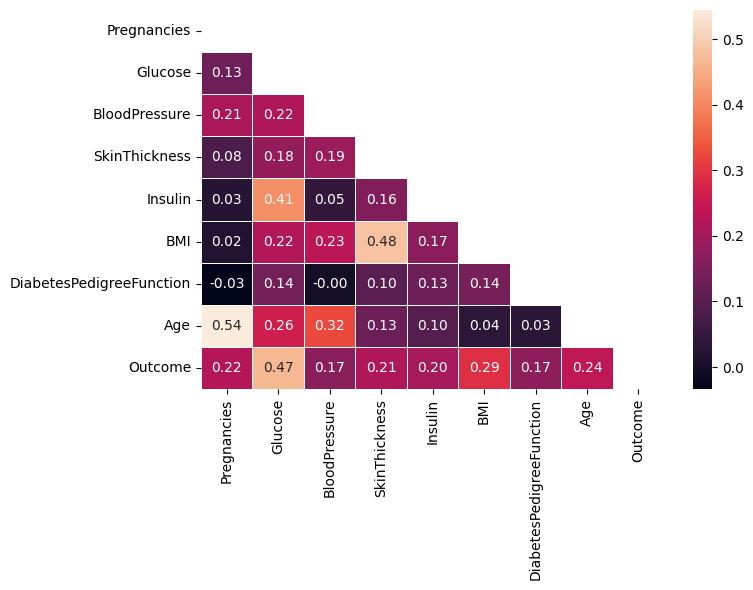

In [332]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

**Conclusiones:**
* La columna más relacionada con el target es la Glucosa seguida del peso corporal de la persona
* Ninguna de las columnas de correlaciona altamente así que no elimino ninguna columna

## Paso 4: Limpieza de Datos

**Conclusiones:** 

* Decido no eliminar columnas:  
Todas sí aportan información relevante para el análisis solamente  



## Paso 5: Ingeniería de características

### Paso 5.1. Analisis de Outliers

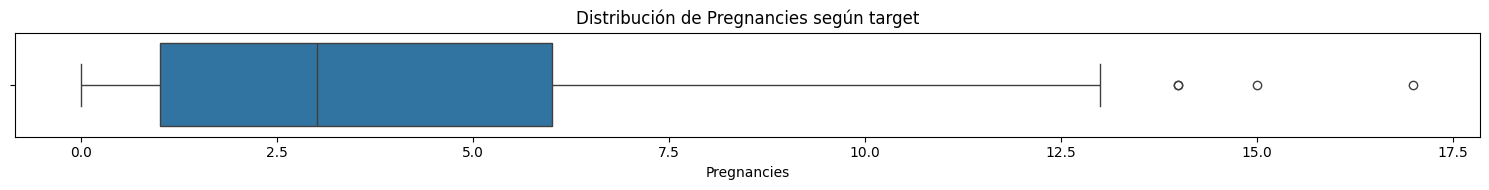

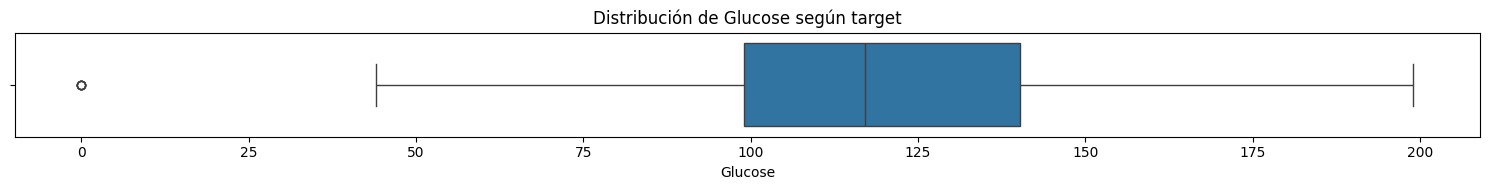

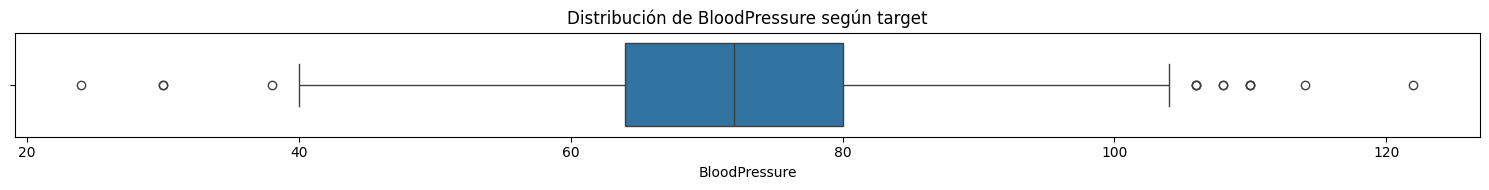

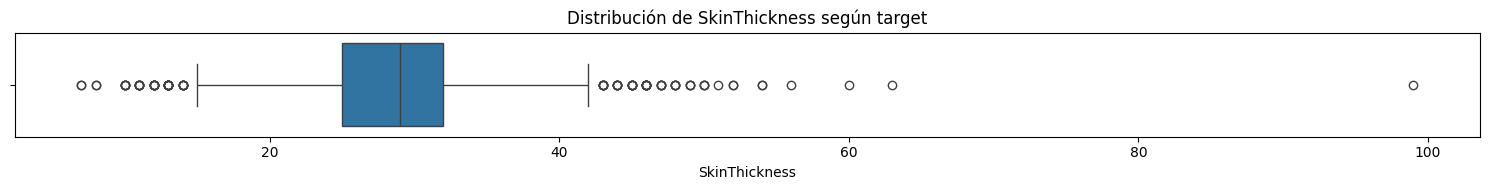

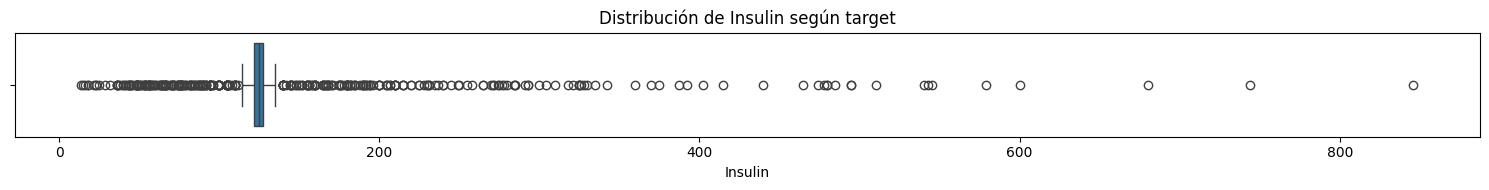

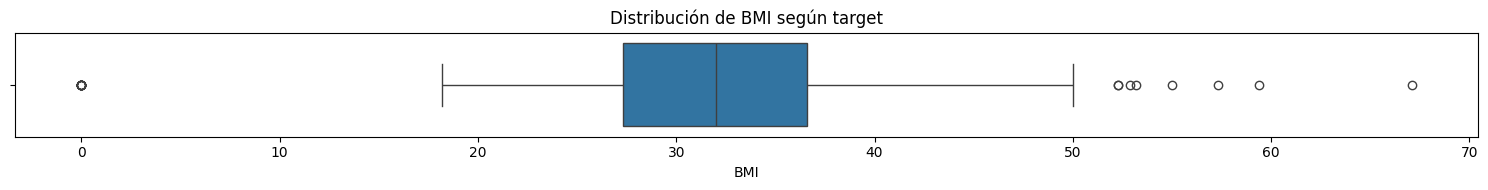

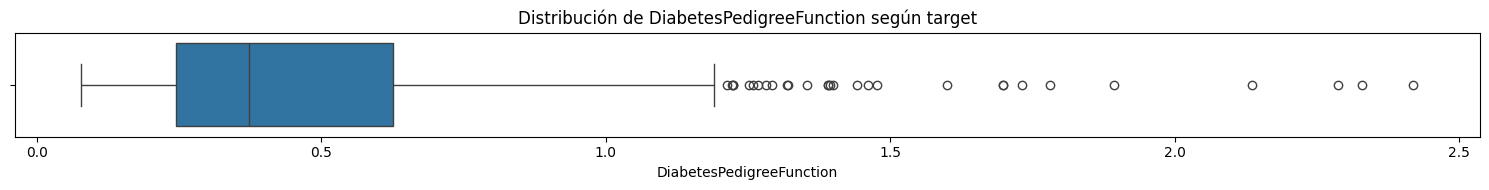

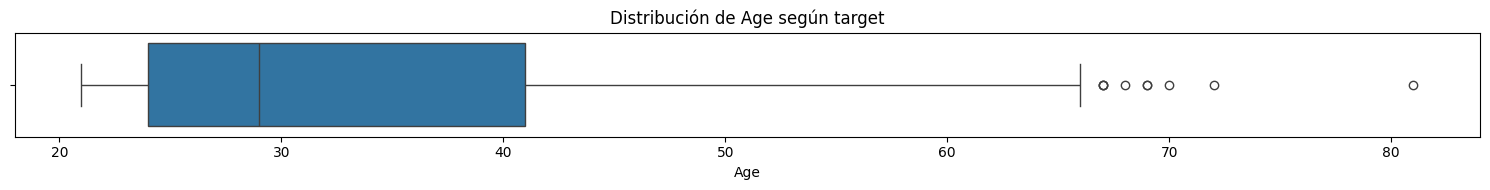

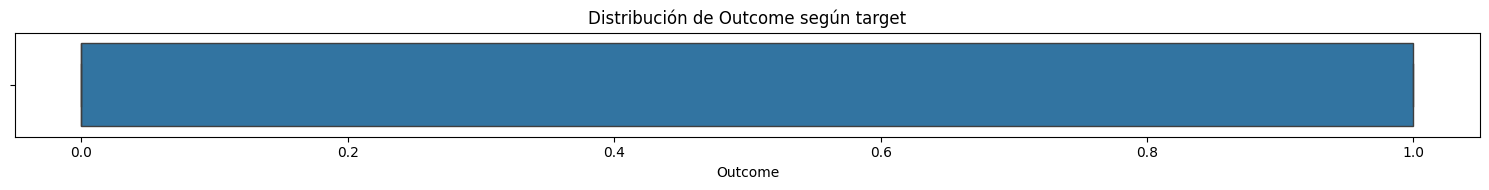

In [334]:
for columna in df:
    plt.figure(figsize=(15,2))
    sns.boxplot(data=df, x=columna, orient="h")
    plt.title(f"Distribución de {columna} según target")
    plt.tight_layout()
    plt.show()

**Conclusiones:**

DUDA; no deberían de haber valores 0, porque hay todavía?

## Guardado del eda para pasarlo al modelo de arbol de decisiones

In [335]:
# Saving processed data
df.to_csv("../data/processed/diabetes_eda.csv", index=False)